<a href="https://colab.research.google.com/github/JulioCezar1111/Projeto20/blob/main/Regress%C3%A3o_Logistica_e_binary_cross_entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RECEITA DE TREINAMENTO**
* 1 - DESIGN DO MODELO (INPUT, OUTPUT, FORWARD PASS)
* 2 - DEFINIÇAO DA FUNÇÃO DE CUSTO E OTIMIZADOR
* 3 - LOOP DE TREINAMENTO:
    - FORWARD PASS: CALCULAR A PREDIÇÃO E O CUSTO
    - BACKWARPASS: CALCULAR OS GRADIENTES
    - ATUALIZAR OS PESOS

# **Instalar Bibliotecas:**

In [103]:
import torch
import torch.nn as nn
import numpy as np
import time
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from torch.autograd import variable


# **Preparação DataSet**

torch.Size([10, 1])
torch.Size([10, 1])


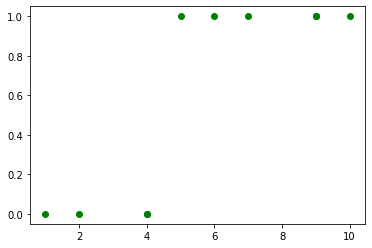

In [104]:
x_numpy = np.array([5,7,2,9,4,10,9,4,6,1])
y_numpy = np.array([1,1,0,1,0,1,1,0,1,0])


x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) # Mudando a direção para vertical
x = x.view(x.shape[0], 1)

print(x.shape)
print(y.shape)

plt.plot(x_numpy, y_numpy, 'go')

# **CLASS DE REGRESSÃO LOGÍSTICA**

In [105]:
class RegressaoLogistica(nn.Module):
  def __init__(self, n_input, n_output):
    super(RegressaoLogistica, self).__init__()
    self.Linear = nn.Linear(n_input, 1) # Objeto para regressão linear (nn.LInear('qtd_entrada', 'qtd_saida'))

  def forward(self, x): # metoda para ser chamado no modelo
    y_hat = torch.sigmoid(self.Linear(x)) # Calcular a função linear e aplicar a sigmoid
    return y_hat

# **DEFINICIÇÃO DE MODELO**

In [106]:
input_size = 1
output_size = 1
model = RegressaoLogistica(input_size, output_size) # Chamando o objeto

# **DEFINIÇÃO DA FUNÇAO DE CUSTO E OTIMIZADOR**

In [107]:
learning_rate = 0.01
criterion = nn.BCELoss() # Função de custo
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # Otimizador
print (model.parameters())

<generator object Module.parameters at 0x7fe76efd79d0>


# **LOOP DE TREINAMENTO**

In [108]:
num_epochs = 200 # repetir o looping
contador_custo = []

for epoch in range(num_epochs):

  #forward pass and loos
  y_hat = model(x) # valor previsto
  loss = criterion(y_hat, y)
  contador_custo.append(loss.detach().numpy())
  #print(y_hat)

  
  #backward pass (calcular gradientes)
  loss.backward()

  #update (atualizar os pesos)
  optimizer.step()

  if (epoch+1)%10 == 0:

      print("===============================")
      print('Epoch: ', epoch)
      print('Custo: {:.20f}'.format(loss.item())) 
      print('m: {:.5f}'.format(model.Linear.weight.data.detach().item()))
      print('m (gradiente): {:.5f}'.format(model.Linear.weight.grad.detach().item()))
      print('b: {:.5f}'.format(model.Linear.bias.data.detach().item()))
      print('b (gradiente): {:.5f}'.format(model.Linear.bias.grad.detach().item()))

     
  #limpar o otimizador
  optimizer.zero_grad()

Epoch:  9
Custo: 0.89182102680206298828
m: -0.01569
m (gradiente): -2.85291
b: -0.49864
b (gradiente): -0.27930
Epoch:  19
Custo: 0.52553319931030273438
m: 0.15334
m (gradiente): -1.01724
b: -0.48699
b (gradiente): -0.02173
Epoch:  29
Custo: 0.47439542412757873535
m: 0.21855
m (gradiente): -0.44685
b: -0.49012
b (gradiente): 0.06158
Epoch:  39
Custo: 0.46244645118713378906
m: 0.25002
m (gradiente): -0.23320
b: -0.49827
b (gradiente): 0.09382
Epoch:  49
Custo: 0.45806169509887695312
m: 0.26735
m (gradiente): -0.13465
b: -0.50856
b (gradiente): 0.10877
Epoch:  59
Custo: 0.45560175180435180664
m: 0.27777
m (gradiente): -0.08407
b: -0.51990
b (gradiente): 0.11630
Epoch:  69
Custo: 0.45370882749557495117
m: 0.28453
m (gradiente): -0.05661
b: -0.53176
b (gradiente): 0.12018
Epoch:  79
Custo: 0.45200133323669433594
m: 0.28928
m (gradiente): -0.04121
b: -0.54390
b (gradiente): 0.12213
Epoch:  89
Custo: 0.45036277174949645996
m: 0.29287
m (gradiente): -0.03241
b: -0.55617
b (gradiente): 0.12303

# **PLOTANDO O GRÁFICO DA FUNÇÃO DE CUSTO**

GRÁFICO DA FUNÇÃO DE CUSTO


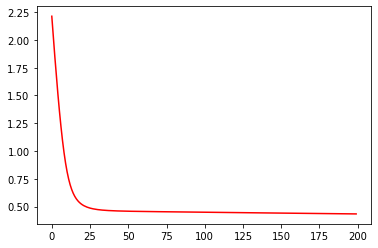

In [109]:
print("GRÁFICO DA FUNÇÃO DE CUSTO")
plt.plot(contador_custo, 'r')
plt.show()

# **fazer predição de teste**

In [110]:
from contextlib import nullcontext

teste = np.array([2, 3, 6, 7, 8])
t_teste = torch.from_numpy(teste.astype(np.float32))
t_teste = t_teste.view(t_teste.shape[0], 1)

with torch.no_grad(): # Evitar de atualizar os gradientes

  predicoes = model(t_teste)

  for x, y in zip(t_teste, predicoes):

    #definindo o cutoff / threshold
    status = nullcontext

    if (y >= 0.7):

      status = "aprovado"

    else:

      status = "reprovado"

    print ('x: {:.2f} | ŷ: {:.2f} | '.format(x.detach().item(),y.detach().item()), status)

x: 2.00 | ŷ: 0.49 |  reprovado
x: 3.00 | ŷ: 0.56 |  reprovado
x: 6.00 | ŷ: 0.77 |  aprovado
x: 7.00 | ŷ: 0.82 |  aprovado
x: 8.00 | ŷ: 0.86 |  aprovado
